(70, 1024) (18, 1024) (70,) (18,)


/home/collin/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:46: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/collin/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:47: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/collin/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:48: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/collin/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:49: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


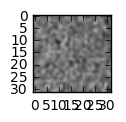

not a particle


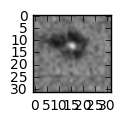

particle


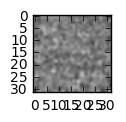

not a particle


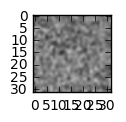

not a particle


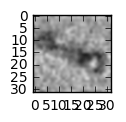

particle


In [114]:
from os import listdir
from os.path import isfile, join
from matplotlib import pyplot as plt
import cv2
import numpy as np
import math

#Read all images from folder
pospath = "/home/collin/Desktop/Positives"
positives = [f for f in listdir(pospath) if isfile(join(pospath, f))]

negpath = "/home/collin/Desktop/Negatives"
negatives = [f for f in listdir(negpath) if isfile(join(negpath, f))]

#create array to hold all data
numImages = len(positives) + len(negatives)
data = np.zeros((numImages, 1025))

#choose 80/20 ratio for splitting data because of Pareto principle
split = math.floor(numImages * 0.8)

#load Positives
for i in range(len(positives)):
    path = "/home/collin/Desktop/Positives/" + positives[i]
    particle = cv2.imread(path)
    particle = cv2.cvtColor(particle, cv2.COLOR_BGR2GRAY)
    
    particle = particle.flatten()
    particle = np.insert(particle, 1024, 1)
    data[i] = particle
    
#load Negatives
for i in range(len(negatives)):
    path = "/home/collin/Desktop/Negatives/" + negatives[i]
    particle = cv2.imread(path)
    particle = cv2.cvtColor(particle, cv2.COLOR_BGR2GRAY)
    
    particle = particle.flatten()
    particle = np.insert(particle, 1024, 0)
    data[len(positives) + i] = particle

#shuffle examples
np.random.shuffle(data)

#split data into training and testing sets
X_train = data[0:split, 0:1024]
y_train = data[0:split, 1024]
X_test = data[split:,0:1024]
y_test = data[split:, 1024]
print X_train.shape, X_test.shape, y_train.shape, y_test.shape

for i in range(5):
    plt.figure(figsize=(1,1))
    test_Image = np.reshape(X_train[i], (32, 32)) 
    plt.imshow(test_Image, cmap = 'gray', interpolation = 'bicubic')
    plt.show()
    if(y_train[i] == 0):
        print "not a particle"
    else:
        print "particle"
